# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read files

In [2]:
train_data = pd.read_csv('trainRegression.csv')
test_data = pd.read_csv('testRegression.csv')
train_data.head()
test_data.head()
train_array = train_data.to_numpy()
test_array = test_data.to_numpy()

# Compute array inverse and multiply to get parameter values 

In [3]:
A = np.array([
    [
        (train_array.shape)[0], (train_array.sum(axis=0))[0],
        np.square(train_array[:,0]).sum(), np.power(train_array[:, 0], 3).sum(),
        np.power(train_array[:, 0], 4).sum()
    ],
    [
        (train_array.sum(axis=0))[0], np.square(train_array[:,0]).sum(),
        np.power(train_array[:, 0], 3).sum(), np.power(train_array[:, 0], 4).sum(),
        np.power(train_array[:, 0], 5).sum()
    ],
    [
        np.square(train_array[:,0]).sum(), np.power(train_array[:, 0], 3).sum(),
        np.power(train_array[:, 0], 4).sum(), np.power(train_array[:, 0], 5).sum(),
        np.power(train_array[:, 0], 6).sum()
    ],
    [
        np.power(train_array[:, 0], 3).sum(), np.power(train_array[:, 0], 4).sum(),
        np.power(train_array[:, 0], 5).sum(), np.power(train_array[:, 0], 6).sum(),
        np.power(train_array[:, 0], 7).sum()
    ],
    [
        np.power(train_array[:, 0], 4).sum(), np.power(train_array[:, 0], 5).sum(),
        np.power(train_array[:, 0], 6).sum(), np.power(train_array[:, 0], 7).sum(),
        np.power(train_array[:, 0], 8).sum()
    ]
])

B = np.array([
    (train_array.sum(axis=0))[1], (train_array[:,1] * train_array[:,0]).sum(), 
    (train_array[:,1] * (np.square(train_array[:,0]))).sum(), (train_array[:,1] * np.power(train_array[:, 0], 3)).sum(),
    (train_array[:,1] * np.power(train_array[:, 0], 4)).sum()
])

result = np.matmul(np.linalg.inv(A), B)

# Get predictions for training data

In [4]:
dummy_ones = np.full(train_array.shape[0], 1)
x_square = np.power(train_array[:, 0], 2)
x_cube = np.power(train_array[:, 0], 3)
x_four = np.power(train_array[:, 0], 4)
temp = np.concatenate((dummy_ones.reshape(train_array.shape[0], 1), 
                        train_array[:, 0].reshape(train_array.shape[0], 1), 
                        x_square.reshape(train_array.shape[0], 1),
                        x_cube.reshape(train_array.shape[0], 1),
                        x_four.reshape(train_array.shape[0], 1)
                      ), axis=1)

predicted_train = np.matmul(temp, result)

# Get predictions for testing data

In [5]:
dummy_ones = np.full(test_array.shape[0], 1)
x_square = np.power(test_array[:, 0], 2)
x_cube = np.power(test_array[:, 0], 3)
x_four = np.power(test_array[:, 0], 4)
temp = np.concatenate((dummy_ones.reshape(test_array.shape[0], 1), 
                        test_array[:, 0].reshape(test_array.shape[0], 1), 
                        x_square.reshape(test_array.shape[0], 1),
                        x_cube.reshape(test_array.shape[0], 1),
                        x_four.reshape(test_array.shape[0], 1)
                      ), axis=1)

predicted_test = np.matmul(temp, result)

# Plot predicted results on training and testing data

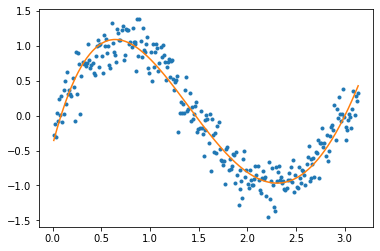

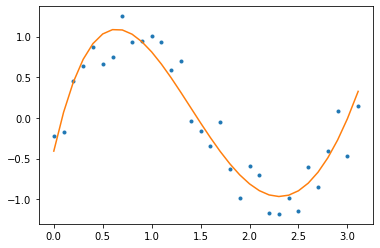

In [14]:
plt.plot(train_data['X'], train_data['R'], '.')
plt.plot(train_data['X'], predicted_train, '-')
plt.show()

plt.plot(test_data['X'], test_data['R'], '.')
plt.plot(test_data['X'], predicted_test, '-')
plt.show()

# Compute Mean Square Errors 

In [8]:
print("Mean Square Error for training data is:", np.sum(np.square(predicted_train - train_array[:, 1])) / (2 * train_array.shape[0]))
print("Mean Square Error for testing data is:", np.sum(np.square(predicted_test - test_array[:, 1])) / (2 * test_array.shape[0]))

Mean Square Error for training data is: 0.022185818262726708
Mean Square Error for testing data is: 0.025184511672910602
